In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Import Trento outputs for 60,000 fluctuating events of PbPb collisions at 5.02 TeV with JETSCAPE MAP parameters


In [2]:
trento_out = np.fromfile('trento_MAP_grad.txt', sep=' ')

In [3]:
trento_out = trento_out.reshape(-1,8)

In [4]:
trento_out_df = pd.DataFrame(trento_out,columns=['event_number', 'impact_param', 'npart', 'mult', 'e2',
                                                 'e3', 'E', 'e5'])

In [5]:
trento_out_df = trento_out_df.iloc[0:10000]

In [6]:
from sklearn.utils import resample

In [7]:
#trento_out_df_values = resample(trento_out_df.values,n_samples=10000)
#trento_out_df = pd.DataFrame(data=trento_out_df_values, columns=trento_out_df.keys())

In [8]:
trento_out_df.shape

(10000, 8)

### Find multiplicity observables by sorting the Trento outputs with integrated reduced thickness

In [9]:
trento_out_df_sorted = trento_out_df.sort_values(by='mult', axis=0, ignore_index=True, ascending=False)

In [10]:
trento_out_df_sorted

,event_number,impact_param,npart,mult,e2,e3,E,e5
0,2398.0,0.418453,411.0,3944.618867,0.128202,0.044632,21.410521,0.030978
1,3558.0,0.478344,414.0,3821.625269,0.046650,0.086226,21.780403,0.071210
2,5683.0,1.174475,411.0,3819.455030,0.056970,0.060554,21.708928,0.059653
3,9163.0,0.584452,410.0,3759.974860,0.096821,0.011142,20.480863,0.023660
4,8136.0,1.091942,411.0,3708.170717,0.116858,0.099999,19.663928,0.143527
...,...,...,...,...,...,...,...,...
9995,9393.0,16.127515,2.0,0.029040,0.035277,0.015198,0.000020,0.041073
9996,3328.0,16.921936,2.0,0.027685,0.103091,0.017047,0.000019,0.008104
9997,1932.0,18.317290,2.0,0.026304,0.099753,0.020939,0.000018,0.007805
9998,7256.0,17.718694,2.0,0.025609,0.041844,0.040874,0.000018,0.052418


/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'b')

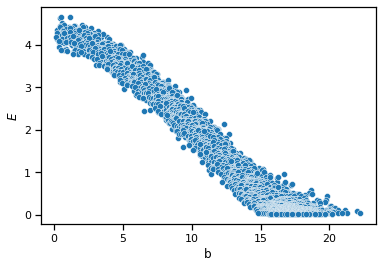

In [11]:
sns.set_context('notebook')
x = trento_out_df_sorted['impact_param']
y = np.sqrt(trento_out_df_sorted['E'])


ax=sns.scatterplot(x,y)
ax.set_ylabel(r'$E$')
ax.set_xlabel('b')

### Calculate $\rho$ for each centrality class

In [12]:
cent_classe = [[0,10],[10,20],[20,30],[30,40],[40,50],[50,60],[60,70],[70,80]]

In [13]:
num_events = len(trento_out_df_sorted)
# We can find event centrality this way
# becausee the events were minimum biased.
event_cen = []

for cen_min, cen_max in cent_classe:
    #print(cen_min,cen_max)
    if cen_min==0:
        n_min=0
    n_max = int(np.floor(num_events * cen_max/100))
    event_cen.append([n_min,n_max])
    n_min = n_max+1
print('Event index ranges corresponding to centralities are as follows')
print(event_cen)

Event index ranges corresponding to centralities are as follows
[[0, 1000], [1001, 2000], [2001, 3000], [3001, 4000], [4001, 5000], [5001, 6000], [6001, 7000], [7001, 8000]]


In [14]:
def calculate_rho(pT_method=0):
    """Calculate rho as a function of centrality using the choosen method to calculate a psuedo observable for pT
    pT_method=0
    -----------
    Calculate pT assuming it's inversely propotional to the integrated reduced thickness function (multiplicity)
    pT_method=1:
    -----------
    Calculate pT assuming it's inversely propotional to the squre root of the integrated reduced
    thickness function (multiplicity)
    pT_method=2:
    Calculate pT assuming it's propotional to the impact parameter
    -----------
    pT_method=3:
    Calculate pT using R^2 value that Trento outputs acording to Giuliano GIACALONE thesis
    Return : 1D array of calculate rho parameter values"""
    
    
    rho = []
    for n_min, n_max in event_cen:
        v2 = np.square(trento_out_df_sorted['e2'][n_min:n_max])
        if pT_method==0:
            pT = np.divide(1,trento_out_df_sorted['mult'][n_min:n_max])
        if pT_method==1:
            pT = np.divide(1,np.sqrt(trento_out_df_sorted['mult'][n_min:n_max]))
        if pT_method==2:
            pT = trento_out_df_sorted['impact_param'][n_min:n_max]
        if pT_method==3:
            pT = np.divide(trento_out_df_sorted['E'][n_min:n_max],trento_out_df_sorted['mult'][n_min:n_max])
        X = np.vstack((v2,pT))
        #print(X.shape)
        rho_value = np.corrcoef(X)
        #print(rho_value)
        # We want the pearson corellation coefficient between v2 and pT. So take the off diagonal
        rho.append(rho_value[0,1])
    #print(rho)
    return(rho)

In [15]:
pT_methods = ['pT $\propto 1/multiplicity$', 'pT $\propto 1/\sqrt{multiplicity}$','pT $\propto b$', 'pT $\propto E/S$']



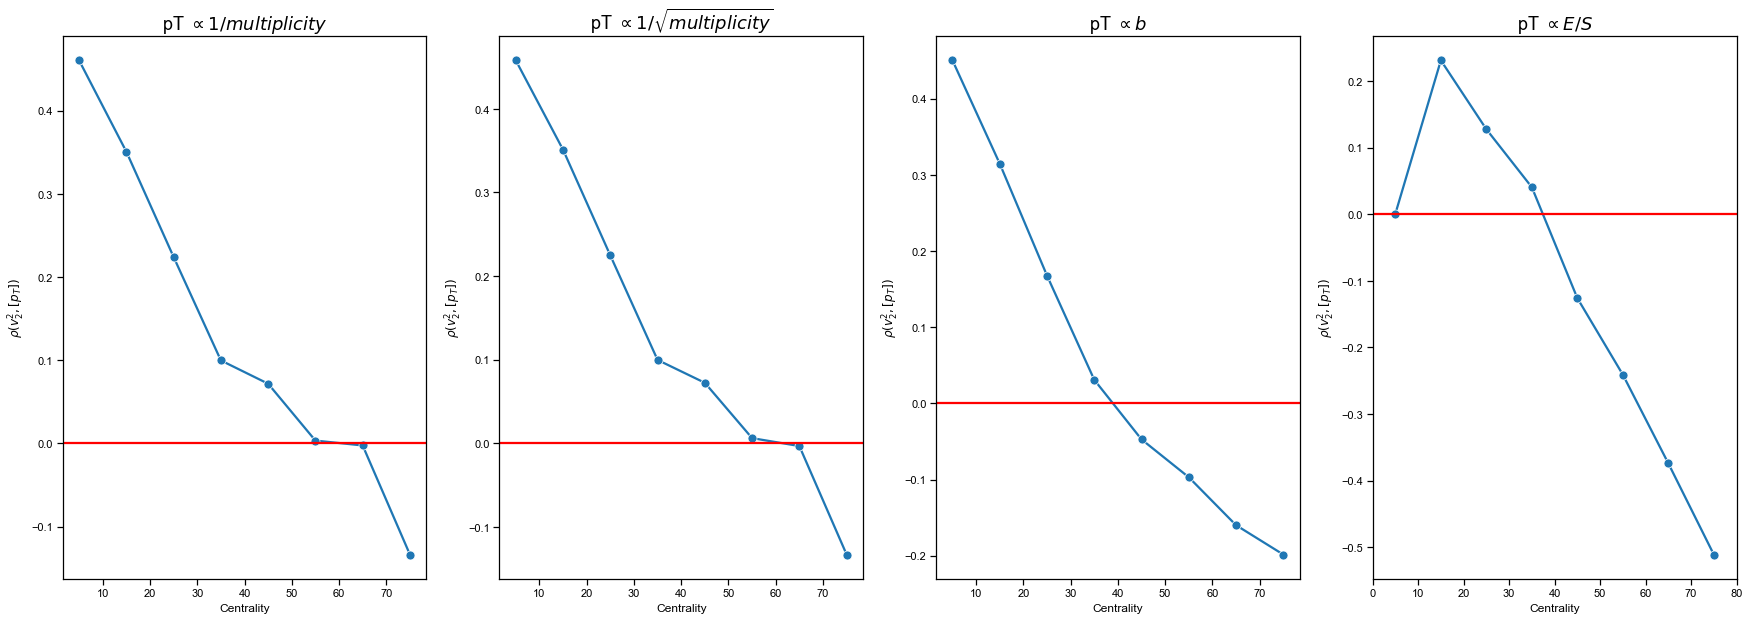

In [16]:
fig, axs = plt.subplots(1,4, figsize=(30,10),sharex=True, sharey=False)
sns.set_style('whitegrid')
sns.set_context('talk')
for i, ax in enumerate(axs):
    rho = calculate_rho(i)
    cen_array = [((mn+mx)/2) for mn,mx in cent_classe]
    sns.lineplot(x=cen_array, y=rho, marker="o",ax=ax)
    ax.axhline(color='r')
    ax.set_title(pT_methods[i])
    ax.set_xticks([0,10,20,30,40,50,60,70,80])
    #ax.set_xticklabels([0,10,20,30,40,50,60,70,80])
    ax.set_xlabel('Centrality')
    ax.set_ylabel(r'$\rho(v_2^{2},[p_T])$')